In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Step:1 Data Load

Objective: Load image and labels from the dataset directory

Explanation:
.We load all image from subfolders
.Resize all images to(64,64)for unifomity
.Store images in X and corresponding labels in Y

In [ ]:
import os
import cv2
import numpy as np

data_dir = "/content/drive/MyDrive/Day1 python/Plant Diseases"  # Corrected path
categories = os.listdir(data_dir)

images = []
labels = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    if os.path.isdir(folder_path): # Check if it's a directory
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(category)

X = np.array(images)
y = np.array(labels)

print("Labels:", np.unique(y))
print("Data Shapes:", X.shape)


Labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
Data Shapes: (800, 64, 64, 3)


Step:2 Data Description

Explanation:

 we count how many images are in each row

class Distribution
Pepper__bell___healthy           308
Potato___healthy                 152
Potato___Early_blight            120
Pepper__bell___Bacterial_spot    110
Potato___Late_blight             110
Name: count, dtype: int64


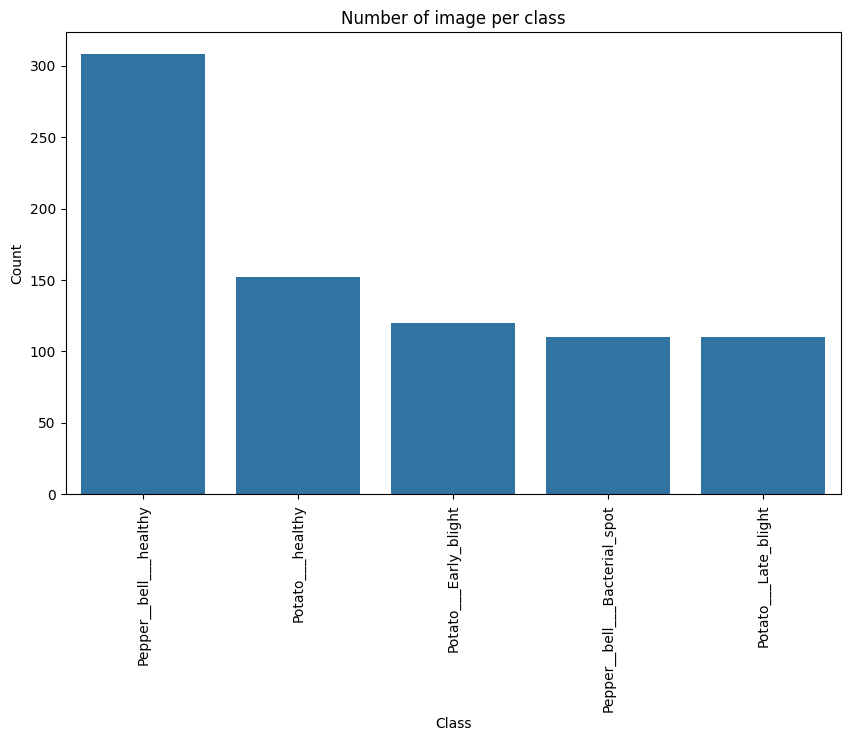

In [ ]:
#count images per class
class_count=pd.Series(labels).value_counts()
print('class Distribution')
print(class_count)

#plot class  distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=class_count.index,y=class_count.values)
plt.xticks(rotation=90)
plt.title("Number of image per class")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Step:3 Data Cleaning

Explanation:

.Ensure all images are valid and of the same shape
.Remove corrupted or misshape images

In [ ]:
# remove corrupted images(if any)
valid_images=[]
valid_labels=[]

for img,label in zip(X,y):
    if img.shape==(64,64,3):
        valid_images.append(img)
        valid_labels.append(label)
X=np.array(valid_images)
y=np.array(valid_labels)
print("classed data shape:",X.shape)

classed data shape: (800, 64, 64, 3)


Step:4 Data Maniplution

Explanation:
.LabelEncoded()converts string labels like
.Apple_scab' to numeric values(eg.0,1,2)
.class_names stores original labels for later interprition

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# save class names for later use
class_names = le.classes_
print(y_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

step:5 Visualization

Explanation:
.Display 9 random images form the dataset
.Helps visually inspect the differences between classes

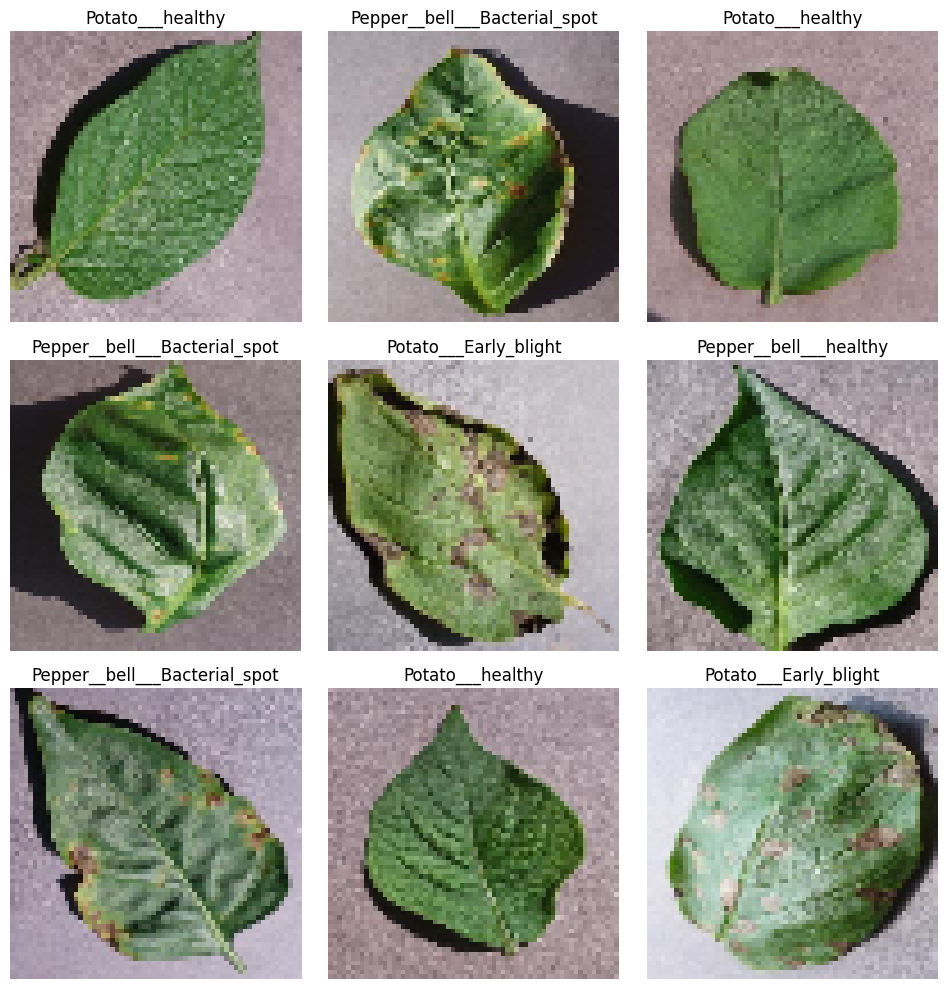

In [ ]:
# Show sample images
import random
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(x))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB)) #Convert  to BGR
    plt.title(class_names[y_encoded[idx]])
    plt.axis('off')
    plt.tight_layout()
plt.show()

Step:6 Feature engineering (color histogram)

explanation:
.Conerts each image to HSV color space
.Computes 3D histogram (hue,Staturation,Value)


In [ ]:
def extract_color_histogram(image,bins=(8,8,8)):
  #Convert to HSV color space
  image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist=cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
  hist=cv2.normalize(hist,hist).flatten()
  return hist

  #Extract features
  hist_features=[extract_color_histogram(img) for img in X]
  X_features=np.array(hist_features)

Step:7 Model Selection: Logistic Regression/SVM

Explation:
.SVM(Support vector Machine)is good for high-dimenstional data like histograms
.Kernel='rbf'-Radial Basis Function kernel
.C=10 Regularization parameter
.gamma='scale'-kernal coefficient

In [ ]:
# Choose model
#model = LogisticRegression(max_iter-1000)
model = SVC(kernel='rbf',C=10,gamma='scale')

Step:8 Training the Model

Explanation:
.train_teat_splict:splits data into 80% train,20% test
.model.fil:Trains the model
.model.predict:predict on the data

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

Step:9 Model Evalution

Explantion:
.confusion_matrix:Shows

Accuracy: 0.8875
F1 Score: 0.8877586885650215


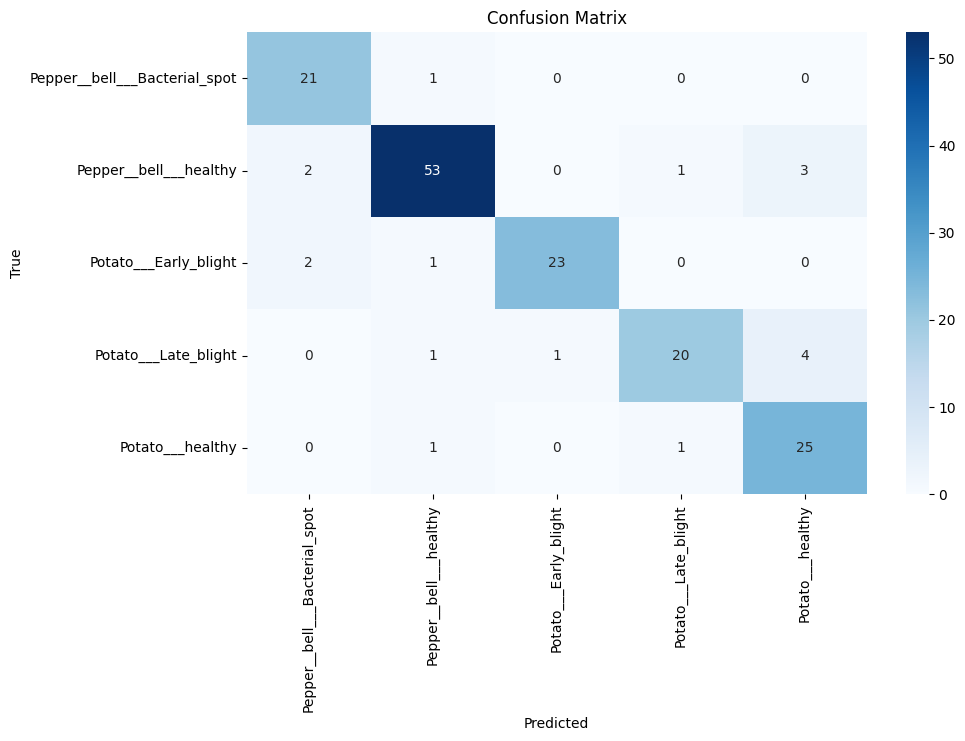

Classification Report:
                                precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.84      0.95      0.89        22
       Pepper__bell___healthy       0.93      0.90      0.91        59
        Potato___Early_blight       0.96      0.88      0.92        26
         Potato___Late_blight       0.91      0.77      0.83        26
             Potato___healthy       0.78      0.93      0.85        27

                     accuracy                           0.89       160
                    macro avg       0.88      0.89      0.88       160
                 weighted avg       0.89      0.89      0.89       160



In [ ]:
from sklearn.metrics import accuracy_score,f1_score ,confusion_matrix, classification_report
#accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)


f1 = f1_score(y_test,y_pred, average='weighted')
print("F1 Score:",f1)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)

#plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#classification report
cr = classification_report(y_test,y_pred,target_names=class_names)
print("Classification Report:\n",cr)